<a href="https://colab.research.google.com/github/notaflyingtoy/Contract-Classifier-and-Recommender/blob/main/Relevance_Task_CS_987.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Relevance Classification Problem CS987
- Team Name - Kerasic Park
- Members - Calum Lockhart 202077518, Joshua Murphy 202059689, Luke Hand 202091647, Anant Tyagi 202060104

##Overview and Abstract

BIP Solutions Ltd. is a company that provides a service where companies that are looking to bid on contracts can search for these contracts on their system.  They have a problem where it can be difficult to know whether a specific document is relevant to a user or not.   This notebook examines data gathered from searches on the BIP Solutions Ltd. website and implements machine learning and neural networks to attempt to predict if a specific document is relevant or not based on the interactions that users have with the documents and their searches.
This notebook contains several methods for predicting the relevance of a document.  A standard machine learning model will be used as a baseline.  A dense 3 layer neural network will also be used as a baseline.  Grid search will be used to find a good configuration for another dense neural network.  Also, a wide and deep model will be utilised to make predictions on the data.  These models will all be ran on non-augmented and augmented data.  They will be compared by their respective f1 scores and by a test score generated through Kaggle.
The best model was the 3 layer dense neural network with 20 neurons at each layer.  This model scored a high f1 score and was the highest scoring model when ran through Kaggle.

##Methods

##Preprocessing with no augmentation

The first step to preprocessing the data was one hot encoding all of the categorical columns in the training set, this included the Search, Day, Month, Source, Type and Nature columns.  The columns Session, Query, Timestamp, User and Psrel were all dropped from the data.  The first three were dropped because they were deemed as not that useful.  User was dropped because it would be difficult to effectively utilise this data due to the large amount of user numbers.  Psrel was dropped from the training data because this is the variable that we are predicting with out models so this was given its own dataframe. 

The ‘cpvs’ column contains lists of the Common Procurement Vocabulary (CPV) codes, a standardised classification system to aid specifically with public procurement tenders [1]. A function was written to extract the first several few numbers from these codes and then the multi label binariser was used to one hot encode them. The first 2 numbers were used to minimise the number of input features and correspond to the most general categories.  

##Preprocessing with augmentation

One feature not used in the non-augmented preprocessing section was the timestamp for when the query was submitted. To examine a possible cyclical pattern to the relevance data, times were extracted in seconds and converted to cos and sin time to make all times distinguishable from each other and in order to not lose the similarity between midnight and 00:30 for example. These were then inputted to the models as additional features and scored using the same criteria [2].

##Models

A random forest classifier was chosen for use as a machine learning baseline model as it requires little data preparation while also being a very powerful method. Random forest classifiers also have greater decision tree diversity than simple decision trees in trading a higher bias for a lower variance resulting in a more effective model. It also has the useful attribute .feature_importances. The utilised random forest had 20 trees.

The second model was a 3-layer neural network model. From a grid search method, 20 neurons are used in dense layer, SELU as input activation function and LeCun as weight kernel initializer in each hidden layer. Batch normalization is implemented for each layer to reduce the vanishing/exploding gradient problem. Binary crossentropy is used as the loss function and the output layer consists of 1 neuron and the sigmoid activation function. The learning rate is set to 0.001 and performance scheduling is used as learning rate schedular

The dense deep model consisted of 4 layers, 3 of which had 20 neurons with a Selu activation function.  The output layer consisted of 1 neuron and had a Sigmoid activation function.  Batch normalization was implemented again in order to reduce the vanishing/exploding gradient problem.  The loss function used was Binary Crossentropy and Nadam was the optimizer use with a learning rate of 0.003.  

A wide and deep model [3] was implemented with 40 features passed to the wide input and 69 to the deep input. The deep input then fed into 2 hidden layers of 30 neurons with selu activation functions. This output was concatenated with the deep input and fed into an output layer with a sigmoid activation function.

##Training

The training for all models consisted of training them on the augmented data and non augmented data.  Both sets of data had a validation set and test set that was taken from the initial training data.  This was done so that the validation accuracy could be calculated as well as the f1 scores.

##Training Schedule

Grid search was used fine tune the hyper parameters.  THe grid search iterated over batch size, optimizer, learning rate, init mode, activation function, dropout rate and neurons per layer.  Early stopping callback was used in order to retain the scores and not waste training time.

In [ ]:
#Models

#Random Forest Model

rnd_clf = RandomForestClassifier(n_estimators=20, max_leaf_nodes=15, n_jobs=-1)

#3 Layer Deep Network

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[89]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal", activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal",activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

#Dense Deep Network

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[89]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal", activation="selu"),
     keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal", activation="selu"),
   keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal",activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

#Wide and Deep Model

leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
input_housing_wide = keras.layers.Input(shape=[40], name="wide_input")
input_housing_deep = keras.layers.Input(shape=[69], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal")(input_housing_deep)
hidden2 = keras.layers.Dense(30, activation="selu")(hidden1)
concat = keras.layers.Concatenate()([input_housing_wide,hidden2])
output = keras.layers.Dense(1,activation = "sigmoid")(concat)

##Results
Non-Augmented Data

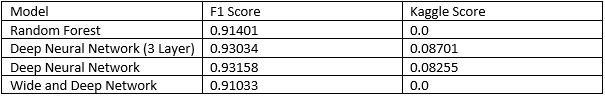

Augmented Data

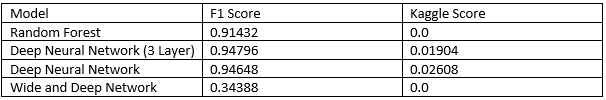

The tables above show the scores that the models achieved for both the augmented and non-augmented data.  All of the f1 scores are fairly similar for all of the models at around 0.9, apart from the wide and deep network that was trained with the augmented data, this network scored a significantly lower f1 score of around 0.35.  The models that performed best on Kaggle were the deep neural network with 3 layers and the regular deep neural network, they both scored around 0.08.  With the augmented data their Kaggle score decreased significantly.  Random forest and wide and deep both scored very poorly on Kaggle.  

The lack of improvement and in some cases reduction of the score due to the data augmentation suggests there is no clear cyclical pattern in the data. 

Wide and deep model was relatively ineffective because no particular feature was a key driver of relevance.  This was confirmed by the feature importance of the random forest classifier that demonstrated this fact.

# Summary

The model that should be considered is the 3 layer dense neural network.  This is due to the fact that it had the highest Kaggle score as well as the second highest f1 score.  This is a quick and easy model to train and implement however the relatively low overall score means that it is unlikely to constitute an effective recommendation system.  Further report may wish to explore the same model using more data in order to improve upon the models performance.

##References

[1] - BiP Solutions CPV Codes Page
    - https://www.bipsolutions.com/news-and-resources/cpv-codes/

[2] - Encoding Cyclical Continuous Features - Ian London
    - https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

[3] - Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow - Aurelion Geron

##Code

In [ ]:
# Include your packages/imports here.


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
from  keras.utils import plot_model

from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime
import re
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
# To check what GPU device you are using you can check with the following -- note that this doesnt work if you switch to a TPU 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
print("The GPU device you are using is:", tf.test.gpu_device_name())

2.4.1
2.4.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15048049844732633997
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15505193728
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7180547241769979352
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
]
The GPU device you are using is: /device:GPU:0


In [ ]:
from google.colab import files
files.upload() #select kaggle.json


Saving test.csv to test.csv
Saving train1.csv to train1.csv


{'test.csv': b'user,session,query,timestamp,search,rank,serp,hour,day,month,dwell,new-sub,premium-pack,source,type,nature,cpvs,#cpv45,Id\n2096178939,3C5FDDE0DBC2E5E812A8DFFAB3491DAA,c71cdfc115f151060c9671fc816cff25,2020-01-21 12:34:56,advanced,2,1,12,Tue,Jan,122,0,0,Contrax Weekly,notice,services,[\'73110000\'],1,0\n2096178939,B9D21C26929EF384ABBB6B544FB38858,c71cdfc115f151060c9671fc816cff25,2020-01-21 17:33:56,advanced,8,1,17,Tue,Jan,8,0,0,Project,award,services,[\'79311000\'],1,1\n2096178939,B9D21C26929EF384ABBB6B544FB38858,c71cdfc115f151060c9671fc816cff25,2020-01-21 17:34:04,advanced,7,1,17,Tue,Jan,26,0,0,PCS,notice,services,[\'73110000\'],1,2\n2096178939,B9D21C26929EF384ABBB6B544FB38858,c71cdfc115f151060c9671fc816cff25,2020-01-21 17:34:36,advanced,3,1,17,Tue,Jan,6,0,0,Contrax Weekly,notice,services,"[\'73110000\', \'85100000\']",2,3\n2096178939,71182AF6B9BCB557CFA9402F6CD97361,c5b7b023e9c78c403d621025a715a95c,2020-01-22 09:34:49,advanced,1,1,09,Wed,Jan,1531,0,0,Contracts Finder,awa

In [ ]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train1.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Add your models here

MODELS WITHOUT DATA AUGMENTATION

TRAIN SET PREPROCESSING

In [ ]:
#One hot encoding the categorical columns in the train set

#One-hot encoding search column

search_onehot = pd.get_dummies(train['search'])
train = train.drop('search', axis = 1)
train = train.join(search_onehot)


#One-hot encoding day column

day_onehot = pd.get_dummies(train['day'])
train = train.drop('day', axis = 1)
train = train.join(day_onehot)


#One-hot encoding month column

month_onehot = pd.get_dummies(train['month'])
train = train.drop('month', axis = 1)
train = train.join(month_onehot)


#One-hot encoding source column

source_onehot = pd.get_dummies(train['source'])
train = train.drop('source', axis = 1)
train = train.join(source_onehot)


#Encoding the type column

type_onehot = pd.get_dummies(train['type'])
train = train.drop('type', axis = 1)
train = train.join(type_onehot)


#Encoding the nature column

nature_onehot = pd.get_dummies(train['nature'])
train = train.drop('nature', axis = 1)
train = train.join(nature_onehot)

In [ ]:
#one hot encoding function
def one_hot_column(col):
  global train
  onehot = pd.get_dummies(train[col]).iloc[:, 1:]
  train = train.drop(col, axis = 1)
  train = train.join(onehot)
  return(train)


# cpvs -> comma separated codes
repls = {"\[","\]"," ","\'"}
for repl in repls:
    train["cpvs"] = train["cpvs"].str.replace(repl,"")

In [ ]:
train['cpvs'] = train['cpvs'].str.split(',')
def first_num(d, digits):
  start_num = []
  for i in d:
    start_num.append(i[0:digits])              
  return (start_num)


In [ ]:
train['cpvs_1'] = train.cpvs.apply(lambda x: first_num(x,2))
x = train["cpvs_1"].to_numpy()
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [ ]:
res = pd.DataFrame(mlb.fit_transform(x),
                   columns=mlb.classes_)
res = res.rename(columns = {'':'none'})
res = res.add_prefix('cpv_')

train = train.join(res)
train.drop(labels = ["cpvs"],axis = 1)

user                           session  ... cpv_92 cpv_98
0         8438057  A311E564F0A79803FB564CEAB6D7499A  ...      0      0
1         8438876  5E91CF19B8BEBA58A90E54EC97AAB3AF  ...      1      0
2       922102585  7D717BA805FB42D51D6C8EC15C0DE2C1  ...      1      0
3      2105483652  D4855E55686DB80328B141598E3174CE  ...      1      0
4         8438876  5E91CF19B8BEBA58A90E54EC97AAB3AF  ...      0      0
...           ...                               ...  ...    ...    ...
32995  2075931238  8239D309542F3F2774D771CBE55C297A  ...      0      0
32996  2075931238  8239D309542F3F2774D771CBE55C297A  ...      0      0
32997  2075931238  8239D309542F3F2774D771CBE55C297A  ...      0      0
32998  2075931238  8239D309542F3F2774D771CBE55C297A  ...      0      0
32999  2075931238  8239D309542F3F2774D771CBE55C297A  ...      0      0

[33000 rows x 95 columns]

In [ ]:
train = train.drop('cpvs', axis = 1)
train = train.drop('cpvs_1', axis = 1)
train.columns
train.isna().sum().any()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 94 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   user                             33000 non-null  int64 
 1   session                          33000 non-null  object
 2   query                            33000 non-null  object
 3   timestamp                        33000 non-null  object
 4   rank                             33000 non-null  int64 
 5   serp                             33000 non-null  int64 
 6   hour                             33000 non-null  int64 
 7   dwell                            33000 non-null  int64 
 8   new-sub                          33000 non-null  int64 
 9   premium-pack                     33000 non-null  int64 
 10  psrel                            33000 non-null  int64 
 11  #cpv45                           33000 non-null  int64 
 12  advanced                        

In [ ]:
train_num1= train.drop(["psrel","user","session","query","timestamp"], axis=1)
Y_num1=train[['psrel']]
Y_num1=Y_num1.to_numpy()
Y_num1 = np.ravel(Y_num1)
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
train_num2 = std_scaler.fit_transform(train_num1)
from sklearn.model_selection import train_test_split
X1_train_full, X1_test, y1_train_full, y1_test = train_test_split(train_num2, Y_num1, test_size=0.2, random_state=42)

In [ ]:
#Splitting the dta for training and validation
X1_valid, X1_train = X1_train_full[:2200], X1_train_full[2200:]
y1_valid, y1_train = y1_train_full[:2200], y1_train_full[2200:]


PREPROCESSING FOR TEST SET

In [ ]:
#One hot encoding the categorical columns in the test set

#One-hot encoding search column

search_onehot = pd.get_dummies(test['search'])
test = test.drop('search', axis = 1)
test = test.join(search_onehot)



#One-hot encoding day column

day_onehot = pd.get_dummies(test['day'])
test = test.drop('day', axis = 1)
test = test.join(day_onehot)


#One-hot encoding month column

month_onehot = pd.get_dummies(test['month'])
test = test.drop('month', axis = 1)
test = test.join(month_onehot)


#One-hot encoding source column

source_onehot = pd.get_dummies(test['source'])
test = test.drop('source', axis = 1)
test = test.join(source_onehot)


#Encoding the type column

type_onehot = pd.get_dummies(test['type'])
test = test.drop('type', axis = 1)
test = test.join(type_onehot)


#Encoding the nature column

nature_onehot = pd.get_dummies(test['nature'])
test= test.drop('nature', axis = 1)
test = test.join(nature_onehot)

In [ ]:
#one hot encoding function
def one_hot_column(col):
  global test
  onehot = pd.get_dummies(test[col]).iloc[:, 1:]
  test = test.drop(col, axis = 1)
  test = test.join(onehot)
  return(test)


# cpvs -> comma separated codes
repls = {"\[","\]"," ","\'"}
for repl in repls:
    test["cpvs"] = test["cpvs"].str.replace(repl,"")

In [ ]:
test['cpvs'] = test['cpvs'].str.split(',')
def first_num(d, digits):
  start_num = []
  for i in d:
    start_num.append(i[0:digits])              
  return (start_num)

In [ ]:
test['cpvs_1'] = test.cpvs.apply(lambda x: first_num(x,2))
x = test["cpvs_1"].to_numpy()
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [ ]:
res = pd.DataFrame(mlb.fit_transform(x),
                   columns=mlb.classes_)
res = res.rename(columns = {'':'none'})
res = res.add_prefix('cpv_')

test = test.join(res)
test.drop(labels = ["cpvs"],axis = 1)

user                           session  ... cpv_92 cpv_98
0     2096178939  3C5FDDE0DBC2E5E812A8DFFAB3491DAA  ...      0      0
1     2096178939  B9D21C26929EF384ABBB6B544FB38858  ...      0      0
2     2096178939  B9D21C26929EF384ABBB6B544FB38858  ...      0      0
3     2096178939  B9D21C26929EF384ABBB6B544FB38858  ...      0      0
4     2096178939  71182AF6B9BCB557CFA9402F6CD97361  ...      0      0
...          ...                               ...  ...    ...    ...
4995  2356896737  EFBF198BFD7B8A2ECDCB36739E9602EA  ...      0      0
4996  2357851077  4EFF829208E39C7B10A58C211DF82D23  ...      0      0
4997  2358654942  45B58602DFABBA5632EF58058390762A  ...      0      0
4998  2358654942  45B58602DFABBA5632EF58058390762A  ...      0      0
4999  2358658221  4F76683B279BF12FFAEFF25AAAB2190E  ...      0      0

[5000 rows x 95 columns]

In [ ]:
test=test.drop("cpvs",axis = 1)
test = test.drop('cpvs_1', axis = 1)
test.columns
test.isna().sum().any()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 94 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   user                             5000 non-null   int64 
 1   session                          5000 non-null   object
 2   query                            5000 non-null   object
 3   timestamp                        5000 non-null   object
 4   rank                             5000 non-null   int64 
 5   serp                             5000 non-null   int64 
 6   hour                             5000 non-null   int64 
 7   dwell                            5000 non-null   int64 
 8   new-sub                          5000 non-null   int64 
 9   premium-pack                     5000 non-null   int64 
 10  #cpv45                           5000 non-null   int64 
 11  Id                               5000 non-null   int64 
 12  advanced                         5

In [ ]:
test_num1= test.drop(["Id","user","session","query","timestamp",], axis=1)

In [ ]:
#Standard scaling the test set
std_scaler = preprocessing.StandardScaler()
test_features1 = std_scaler.fit_transform(test_num1)


PREPROCESSING AND DATA AUGMENTATION

In [ ]:
submission = pd.read_csv("test.csv")
train = pd.read_csv("train1.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
def get_time(timestamp):
  time = datetime.strptime(timestamp[11:],'%H:%M:%S').time()
  seconds = (time.hour * 60 + time.minute) * 60 + time.second
  return seconds

def time_cyclical_encoding(df, data_aug):
  #from https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/
  #this encodes the time of day as 2 colums cos time and sin time
  if data_aug:
    seconds_in_day = 24*60*60
    #datetime.strptime(timestring,'%H:%M:%S')
    df['sin_time'] = np.sin(2*np.pi*df.time/seconds_in_day)
    df['cos_time'] = np.cos(2*np.pi*df.time/seconds_in_day)
  df = df.drop('time', axis = 1)
  return df

def fit_cpv_binarizer(df1, df2, digits):
  df1_copy = df1.copy()
  df2_copy = df2.copy()
  df = df1_copy.append(df2_copy)
  mlb = binarize_cpv(df, digits)
  return mlb

def truncate_num(d, digits):
  start_num = []
  for i in d:
    start_num.append(i[0:digits])              
  return (start_num)

def get_order_no(df, target_col, group_col, order_col):
  # get session_no & query_no
  A = df[[target_col,group_col, order_col]]
  A = A.sort_values(order_col)
  A = A.drop(order_col, axis = 1)
  A = A.drop_duplicates()
  A[target_col + '_no'] = A.groupby(group_col).cumcount()
  A = A.drop(group_col, axis = 1)
  df = df.merge(A, how = 'left')
  return df

def clean_cpvs(cpvs):
  if cpvs!=cpvs:
    print('NaN!!!')
  cpvs_clean = re.sub(r'[\[\]\s\']','',cpvs)
  return cpvs_clean


def binarize_cpv(df, cpv_digits, mlb = None):
  # split list of cpv into one hot encoded data frame
  # cpv codes can be truncated down as far as two digits
  # info on cpv: https://simap.ted.europa.eu/cpv
  df['cpvs'] = df['cpvs'].apply(clean_cpvs)

  df['cpvs'] = df['cpvs'].str.split(',')

  x = df.cpvs.apply(lambda x: truncate_num(x,cpv_digits))

  # binarizer passed so fit and return altered dataframe
  if mlb == None:
    mlb = MultiLabelBinarizer()
    mlb.fit(x)
    return mlb
  else:
    X = mlb.transform(x)
    df_cpv = pd.DataFrame(X, columns = mlb.classes_)
    df_cpv = df_cpv.rename(columns = {'':'none'})
    df_cpv = df_cpv.add_prefix('cpv_')
    df = df.join(df_cpv)
    return df

#one hot encoding function
#def one_hot_column(df, col):
#  onehot = pd.get_dummies(df[col]).iloc[:, 1:]
#
#  df = df.drop(col, axis = 1)
#  df = df.join(onehot)
#  return(df)
def OHE(df, col):
  # one hot encode column (col) in dataframe (df) then replace original column 
  # with one hot encoded column
  ohe = OneHotEncoder(sparse = False)
  #ohe_values = ohe.fit_transform(df[[col]])
  df_ohe_values = pd.DataFrame(ohe.fit_transform(df[[col]]),#ohe_values, 
                               columns = 
                                np.ndarray.flatten(np.array(ohe.categories_)))
  df_ohe_values = df_ohe_values.add_prefix(col + '_')
  #ohe_cols = np.array(ohe.categories_).astype(str)
  #ohe_cols = [col + '_' + s for s in ohe_cols]#[s for s in ohe.categories_]
  #ohe_cols = ohe_cols.astype(str)
  #df_ohe_values = pd.DataFrame(ohe_values,
  #                             columns = np.ndarray.flatten(np.array(ohe_cols)))
  df = pd.concat((df, df_ohe_values), axis = 1)
  df = df.drop(col, axis = 1)
  return df

def prepare(df, cpv_digits, mlb_cpv, data_aug):
  # dwell can be left alone
  df.nature = df.nature.fillna('empty')#df = df.drop('nature', axis = 1)

  category_columns = ["search", "day", "month", "source", "type", "nature"]

  for cat in category_columns:
    df = OHE(df, cat)
  
  df = binarize_cpv(df, cpv_digits, mlb_cpv)
  df = df.drop('cpvs', axis = 1)

  # get session and query no, a sequential number grouped by user & session 
  # respectively ordered by timestamp
  df = get_order_no(df, 'session', 'user', 'timestamp')
  df = get_order_no(df, 'query', 'session', 'timestamp')
  
  df['time'] = df.timestamp.apply(get_time)
  df = time_cyclical_encoding(df, data_aug)

  df = df.drop(['user', 'session', 'query', 'timestamp', 'hour'],
               axis = 1)
  return df

def split(df, split1, split2):
  train, test = train_test_split(df, test_size = split1, random_state = 42)
  train, val = train_test_split(train, test_size = split2, random_state = 42)
  return train, test, val

def fit_pred_svm(X_train, y_train, X_test, y_test):
  clf = LogisticRegression()
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  f1 = f1_score(y_test, pred, average = 'binary')
  return pred, f1

In [ ]:
mlb_cpv = 2
mlb = fit_cpv_binarizer(train, submission, mlb_cpv)
train_copy = train.copy()
df_train = prepare(train_copy, mlb_cpv, mlb, True)


submission_copy = submission.copy()
df_submission = prepare(submission_copy, mlb_cpv, mlb, True)

In [ ]:
train_copy = train.copy()
df_train_aug = prepare(train_copy, mlb_cpv, mlb, False)
print(df_train_aug.columns)

Index(['rank', 'serp', 'dwell', 'new-sub', 'premium-pack', 'psrel', '#cpv45',
       'search_advanced', 'search_dropdown', 'search_quick', 'search_saved',
       'day_Fri', 'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue',
       'day_Wed', 'month_Apr', 'month_Feb', 'month_Jan', 'month_Jun',
       'month_Mar', 'month_May', 'source_Contracts Finder',
       'source_Contrax Weekly', 'source_Defence Contracts International',
       'source_EBS', 'source_Exporting Opportunity', 'source_FedCon',
       'source_Glenigan', 'source_Intercon', 'source_MoD Contracts Bulletin',
       'source_PCS', 'source_Project', 'source_Tracker', 'type_adden',
       'type_award', 'type_notice', 'type_tenis', 'nature_empty',
       'nature_services', 'nature_supplies', 'nature_works', 'cpv_none',
       'cpv_03', 'cpv_09', 'cpv_14', 'cpv_15', 'cpv_16', 'cpv_18', 'cpv_19',
       'cpv_22', 'cpv_24', 'cpv_30', 'cpv_31', 'cpv_32', 'cpv_33', 'cpv_34',
       'cpv_35', 'cpv_37', 'cpv_38', 'cpv_39', 'cpv_41',

In [ ]:
#Y_num1=Y_num1.to_numpy()
#Y_num1 = np.ravel(Y_num1)
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
#train_num2 = std_scaler.fit_transform(train_num1)

#Y_num1=Y_num1.to_numpy()
#Y_num1 = np.ravel(Y_num1)


train, test2, val = split(df_train, .25, .2)
X_train1 = train.drop('psrel', axis = 1)
y_train1 = train.psrel
X_test1 = test2.drop('psrel', axis = 1)
y_test1 = test2.psrel
X_val1 = val.drop('psrel', axis = 1)
y_val1 = val.psrel

X_train2 = std_scaler.fit_transform(X_train1)
y_train2 = y_train1.to_numpy()
Y_train2 = np.ravel(y_train1)
X_test2 = std_scaler.fit_transform(X_test1)
y_test2 = y_test1.to_numpy()
y_test2 = np.ravel(y_test1)

X_valid2 = std_scaler.fit_transform(X_val1)
y_valid2 = y_val1.to_numpy()
y_valid2 = np.ravel(y_val1)




submission_id = df_submission.Id
X_submission1 = df_submission.drop('Id', axis = 1)

input_dim = len(X_submission1.columns)

X_submission2 = std_scaler.fit_transform(X_submission1)

RANDOMISED GRID SEARCH FOR UNAUGMENTED DATA

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# Parameter space what we want explore
# Note that it exactly matches up to our build_model function parameters.

param_distribs = {
    "n_hidden":[0,1,2,3,4],
    "n_neurons": np.arange(20,70),
    "learning_rate": [3e-2,3e-3,3e-4],
    "activation": ['softmax', 'selu', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
}

# Set up the search - trying n_iter possibilities for cv folds
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=2)
rnd_search_cv.fit(X1_train, y1_train, epochs=50, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)], verbose=0)

379/379 [==============================] - 0s 911us/step - loss: 14.3217 - accuracy: 0.0608


RuntimeError: ignored

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)



{'n_neurons': 56, 'n_hidden': 2, 'learning_rate': 0.03, 'activation': 'hard_sigmoid'}
0.9416942298412323


In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=89, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [20,25,32,30,40]
epochs = [20,30,40,50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))
#Best: 0.947810 using {'batch_size': 32, 'epochs': 50}

Best: 0.947810 using {'batch_size': 32, 'epochs': 50}
0.947190 (0.004520) with: {'batch_size': 20, 'epochs': 20}
0.945992 (0.004157) with: {'batch_size': 20, 'epochs': 30}
0.945702 (0.003601) with: {'batch_size': 20, 'epochs': 40}
0.946240 (0.003222) with: {'batch_size': 20, 'epochs': 50}
0.946529 (0.002547) with: {'batch_size': 25, 'epochs': 20}
0.947603 (0.003671) with: {'batch_size': 25, 'epochs': 30}
0.945826 (0.004210) with: {'batch_size': 25, 'epochs': 40}
0.945868 (0.002908) with: {'batch_size': 25, 'epochs': 50}
0.945372 (0.002867) with: {'batch_size': 32, 'epochs': 20}
0.947521 (0.003235) with: {'batch_size': 32, 'epochs': 30}
0.946942 (0.003025) with: {'batch_size': 32, 'epochs': 40}
0.947810 (0.003605) with: {'batch_size': 32, 'epochs': 50}
0.945661 (0.002315) with: {'batch_size': 30, 'epochs': 20}
0.947686 (0.004347) with: {'batch_size': 30, 'epochs': 30}
0.947479 (0.003776) with: {'batch_size': 30, 'epochs': 40}
0.946818 (0.003613) with: {'batch_size': 30, 'epochs': 50}
0.

In [ ]:

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=89, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))
Best: 0.948760 using {'optimizer': 'SGD'}

Best: 0.948760 using {'optimizer': 'SGD'}
0.948760 (0.003537) with: {'optimizer': 'SGD'}
0.945454 (0.005501) with: {'optimizer': 'RMSprop'}
0.941694 (0.004384) with: {'optimizer': 'Adagrad'}
0.941694 (0.004384) with: {'optimizer': 'Adadelta'}
0.944876 (0.002443) with: {'optimizer': 'Adam'}
0.948182 (0.003421) with: {'optimizer': 'Adamax'}
0.945950 (0.003605) with: {'optimizer': 'Nadam'}


In [ ]:
# Use scikit-learn to grid search the learning rate and momentum
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=89, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.03, 0.003, 0.3, 0.02, 0.01]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948595 using {'learn_rate': 0.02, 'momentum': 0.2}
0.946529 (0.001874) with: {'learn_rate': 0.03, 'momentum': 0.0}
0.947438 (0.003164) with: {'learn_rate': 0.03, 'momentum': 0.2}
0.946364 (0.001761) with: {'learn_rate': 0.03, 'momentum': 0.4}
0.943926 (0.003101) with: {'learn_rate': 0.03, 'momentum': 0.6}
0.944256 (0.006277) with: {'learn_rate': 0.03, 'momentum': 0.8}
0.945330 (0.005870) with: {'learn_rate': 0.03, 'momentum': 0.9}
0.942521 (0.003754) with: {'learn_rate': 0.003, 'momentum': 0.0}
0.945702 (0.003496) with: {'learn_rate': 0.003, 'momentum': 0.2}
0.945620 (0.002466) with: {'learn_rate': 0.003, 'momentum': 0.4}
0.947686 (0.003070) with: {'learn_rate': 0.003, 'momentum': 0.6}
0.948223 (0.003712) with: {'learn_rate': 0.003, 'momentum': 0.8}
0.947438 (0.003508) with: {'learn_rate': 0.003, 'momentum': 0.9}
0.939835 (0.004495) with: {'learn_rate': 0.3, 'momentum': 0.0}
0.944297 (0.006457) with: {'learn_rate': 0.3, 'momentum': 0.2}
0.944587 (0.003812) with: {'learn_rate': 

In [ ]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=89, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'lecun_normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.947231 using {'init_mode': 'uniform'}
0.947231 (0.003870) with: {'init_mode': 'uniform'}
0.946157 (0.003741) with: {'init_mode': 'lecun_uniform'}
0.945826 (0.003303) with: {'init_mode': 'lecun_normal'}
0.941694 (0.004384) with: {'init_mode': 'zero'}
0.945496 (0.002212) with: {'init_mode': 'glorot_normal'}
0.945248 (0.002080) with: {'init_mode': 'glorot_uniform'}
0.945289 (0.004357) with: {'init_mode': 'he_normal'}
0.945041 (0.002814) with: {'init_mode': 'he_uniform'}


In [ ]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=89, kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'selu', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.949463 using {'activation': 'softsign'}
0.946735 (0.004696) with: {'activation': 'softmax'}
0.947562 (0.004510) with: {'activation': 'selu'}
0.949463 (0.003663) with: {'activation': 'softsign'}
0.947231 (0.003572) with: {'activation': 'relu'}
0.948554 (0.003947) with: {'activation': 'tanh'}
0.948223 (0.003870) with: {'activation': 'sigmoid'}
0.948264 (0.003805) with: {'activation': 'hard_sigmoid'}
0.941570 (0.004290) with: {'activation': 'linear'}


In [ ]:

# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=89, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.941694 using {'dropout_rate': 0.0, 'weight_constraint': 1}
0.941694 (0.004384) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.941653 (0.004327) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.941611 (0.004269) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.941653 (0.004327) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.941694 (0.004384) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.941694 (0.004384) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.941694 (0.004384) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.941653 (0.004327) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.941611 (0.004269) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.941611 (0.004269) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.941694 (0.004384) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.941694 (0.004384) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.941653 (0.004327) with: {'dropout_rate': 0.2, 'weight_constraint': 

In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=89, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [20,100,200,300,400,500]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.941694 using {'neurons': 20}
0.941694 (0.004384) with: {'neurons': 20}
0.941611 (0.004269) with: {'neurons': 100}
0.941653 (0.004405) with: {'neurons': 200}
0.941611 (0.004269) with: {'neurons': 300}
0.941653 (0.004422) with: {'neurons': 400}
0.941570 (0.004290) with: {'neurons': 500}


In [ ]:
# Add your models here

MODEL WITHOUT AUGMENTED DATA


RANDOM FOREST BASELINE MODEL


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=20, max_leaf_nodes=15, n_jobs=-1)
rnd_clf.fit(X1_train, y1_train)
model = rnd_clf.predict(X1_test)
y_pred = rnd_clf.predict(X1_test)
print(accuracy_score(y1_test, y_pred))



0.9398484848484848


In [ ]:
rnd_clf.feature_importances_

array([0.0522851 , 0.06504228, 0.09413123, 0.14360454, 0.0214792 ,
       0.02101985, 0.00280621, 0.10740162, 0.        , 0.02834755,
       0.02177587, 0.0014796 , 0.01285201, 0.        , 0.00324087,
       0.01236173, 0.01857682, 0.02997008, 0.06757754, 0.        ,
       0.03726352, 0.0426428 , 0.00289072, 0.00926227, 0.00079314,
       0.00223857, 0.        , 0.        , 0.        , 0.        ,
       0.09490693, 0.        , 0.        , 0.0005206 , 0.        ,
       0.        , 0.        , 0.00574079, 0.0048727 , 0.        ,
       0.03032973, 0.00101905, 0.00264629, 0.        , 0.        ,
       0.        , 0.00042099, 0.00060905, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00093474, 0.00058825, 0.        ,
       0.        , 0.        , 0.        , 0.00173912, 0.00335879,
       0.        , 0.03162705, 0.        , 0.        , 0.        ,
       0.00243691, 0.        , 0.        , 0.        , 0.00066

In [ ]:
y_pred1 = rnd_clf.predict(X1_test)
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y1_test,y_pred1, average= 'weighted')

0.9140127830389969

3 layer baseline neural network model



*  Implemented: Batch normalization 
*  Learning rate scheduler: Performance scheduling
*  Input activation function: SELU
*   Initializer: LeCun normal
*   Loss function: Binary crossentropy
*   Optimizer:Nadam
* Output layer activation function: Sigmoid
*Callback: Model checkpoint
*Learning rate: 0.001
*Epochs:20

In [ ]:
#Score on kaggle: 0.087

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[89]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal", activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal",activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,name='Nadam'),metrics=["accuracy"])
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=3)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
batch_size = 32
print("Batch Size: {}".format(batch_size))
history = model.fit(X1_train, y1_train, epochs=20, batch_size=batch_size, validation_data=(X1_valid, y1_valid),callbacks=[lr_scheduler,checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")



Batch Size: 32
Epoch 1/20
757/757 [==============================] - 5s 5ms/step - loss: 0.4520 - accuracy: 0.8203 - val_loss: 0.2327 - val_accuracy: 0.9336
Epoch 2/20
757/757 [==============================] - 4s 5ms/step - loss: 0.1982 - accuracy: 0.9417 - val_loss: 0.2262 - val_accuracy: 0.9336
Epoch 3/20
757/757 [==============================] - 4s 5ms/step - loss: 0.1866 - accuracy: 0.9448 - val_loss: 0.2231 - val_accuracy: 0.9327
Epoch 4/20
757/757 [==============================] - 4s 5ms/step - loss: 0.1779 - accuracy: 0.9477 - val_loss: 0.2240 - val_accuracy: 0.9314
Epoch 5/20
757/757 [==============================] - 4s 5ms/step - loss: 0.1772 - accuracy: 0.9478 - val_loss: 0.2133 - val_accuracy: 0.9359
Epoch 6/20
757/757 [==============================] - 4s 5ms/step - loss: 0.1766 - accuracy: 0.9472 - val_loss: 0.2299 - val_accuracy: 0.9314
Epoch 7/20
757/757 [==============================] - 4s 5ms/step - loss: 0.1759 - accuracy: 0.9470 - val_loss: 0.2240 - val_accuracy

In [ ]:
y_pred = model.predict([test_features1])
y_pred.round(2)
y_pred = np.argmax(model.predict(test_features1), axis=-1)
y_pred = model.predict_classes(test_features1)
df = pd.DataFrame(y_pred, columns = ['psrel'])
Id = test["Id"]

forest_predictions=pd.concat([Id, df.reindex(Id.index)], axis=1)
forest_predictions.to_csv('3 Layer neural network baseline model without data augmentation (Task 1).csv', header = True,index = False)

from google.colab import files
files.download("3 Layer neural network baseline model without data augmentation (Task 1).csv")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred1 = model.predict([X1_test])
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y1_test,y_pred1, average= 'weighted')

0.930340205222129

A dense deep neural network

*  Implemented: Batch normalization 
*  Learning rate scheduler: Performance scheduling
*  Input activation function: SELU
*   Initializer: LeCun normal
*   Loss function: Binary crossentropy
*   Optimizer:Nadam
* Output layer activation function: Sigmoid
*Callback: Model checkpoint
*Learning rate: 0.003
*Epochs:20

In [ ]:
#Score on kaggle:0.08255 
#Dense deep neural network
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[89]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal", activation="selu"),
     keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal", activation="selu"),
   keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal",activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Nadam(learning_rate=0.003, beta_1=0.9, beta_2=0.999,name='Nadam'),metrics=["accuracy"])
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=2)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)


batch_size = 32
print("Batch Size: {}".format(batch_size))
history = model.fit(X1_train, y1_train, epochs=30, batch_size=batch_size, validation_data=(X1_valid, y1_valid),callbacks=[lr_scheduler,checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")





Batch Size: 32
Epoch 1/30
757/757 [==============================] - 7s 6ms/step - loss: 0.3198 - accuracy: 0.8913 - val_loss: 0.2278 - val_accuracy: 0.9323
Epoch 2/30
757/757 [==============================] - 4s 6ms/step - loss: 0.1804 - accuracy: 0.9472 - val_loss: 0.2149 - val_accuracy: 0.9323
Epoch 3/30
757/757 [==============================] - 5s 6ms/step - loss: 0.1825 - accuracy: 0.9466 - val_loss: 0.2186 - val_accuracy: 0.9350
Epoch 4/30
757/757 [==============================] - 5s 6ms/step - loss: 0.1701 - accuracy: 0.9501 - val_loss: 0.2131 - val_accuracy: 0.9368
Epoch 5/30
757/757 [==============================] - 5s 6ms/step - loss: 0.1697 - accuracy: 0.9503 - val_loss: 0.1995 - val_accuracy: 0.9382
Epoch 6/30
757/757 [==============================] - 5s 6ms/step - loss: 0.1683 - accuracy: 0.9501 - val_loss: 0.2072 - val_accuracy: 0.9377
Epoch 7/30
757/757 [==============================] - 5s 6ms/step - loss: 0.1652 - accuracy: 0.9508 - val_loss: 0.2075 - val_accuracy

In [ ]:
 model.evaluate([X_valid],[y_valid])


69/69 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9414


[0.18993638455867767, 0.9413636326789856]

In [ ]:
y_pred = model.predict([test_features1])
y_pred.round(2)
y_pred = np.argmax(model.predict(test_features1), axis=-1)
y_pred = model.predict_classes(test_features1)
df = pd.DataFrame(y_pred, columns = ['psrel'])
Id = test["Id"]

forest_predictions=pd.concat([Id, df.reindex(Id.index)], axis=1)
forest_predictions.to_csv('Dense deep neural network model without data augmentation (Task 1).csv', header = True,index = False)

from google.colab import files
files.download("Dense deep neural network model without data augmentation (Task 1).csv")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred1 = model.predict([X1_test])
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y1_test,y_pred1, average= 'weighted')

0.9315765895716086

WIDE AND DEEP NETWORK 

*  Implemented: Batch normalization 
*  Learning rate scheduler: Performance scheduling
*  Input activation function: SELU
*   Initializer: LeCun normal
*   Loss function: Binary crossentropy
*   Optimizer:Nadam
* Output layer activation function: Sigmoid
*Callback: Model checkpoint
*Learning rate: 0.0003
*Epochs:20


In [ ]:
# what if we wanted to pass different inputs in at the different points in the model??
# pg 310
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
input_housing_wide = keras.layers.Input(shape=[40], name="wide_input")
input_housing_deep = keras.layers.Input(shape=[69], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal")(input_housing_deep)
hidden2 = keras.layers.Dense(30, activation="selu")(hidden1)
concat = keras.layers.Concatenate()([input_housing_wide,hidden2])
output = keras.layers.Dense(1,activation = "sigmoid")(concat)
model = keras.Model(inputs=[input_housing_wide, input_housing_deep], outputs=[output])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(clipvalue=1.0,lr=3e-4,momentum=0.2),metrics=["accuracy"])

X_train_wide, X_train_deep = X1_train[:,:40], X1_train[:,20:]
X_valid_wide, X_valid_deep = X1_valid[:,:40], X1_valid[:,20:]
X_test_wide, X_test_deep = X1_test[:,:40], X1_test[:,20:]
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)

batch_size = 32
print("Batch Size: {}".format(batch_size))
history = model.fit([X_train_wide, X_train_deep], y1_train, epochs=20, validation_data=([X_valid_wide, X_valid_deep], y1_valid),callbacks=[lr_scheduler,checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5")

Batch Size: 32
Epoch 1/20
757/757 [==============================] - 2s 3ms/step - loss: 0.8296 - accuracy: 0.5361 - val_loss: 0.7052 - val_accuracy: 0.6145
Epoch 2/20
757/757 [==============================] - 2s 2ms/step - loss: 0.6622 - accuracy: 0.6483 - val_loss: 0.5842 - val_accuracy: 0.7145
Epoch 3/20
757/757 [==============================] - 2s 2ms/step - loss: 0.5555 - accuracy: 0.7445 - val_loss: 0.4975 - val_accuracy: 0.7841
Epoch 4/20
757/757 [==============================] - 2s 2ms/step - loss: 0.4736 - accuracy: 0.8096 - val_loss: 0.4339 - val_accuracy: 0.8295
Epoch 5/20
757/757 [==============================] - 2s 2ms/step - loss: 0.4035 - accuracy: 0.8652 - val_loss: 0.3869 - val_accuracy: 0.8700
Epoch 6/20
757/757 [==============================] - 2s 2ms/step - loss: 0.3658 - accuracy: 0.8911 - val_loss: 0.3524 - val_accuracy: 0.8891
Epoch 7/20
757/757 [==============================] - 2s 2ms/step - loss: 0.3282 - accuracy: 0.9069 - val_loss: 0.3270 - val_accuracy

In [ ]:
X_train_wide, X_train_deep = test_num1.iloc[:,:40], test_num1.iloc[:,20:]

std_scaler = preprocessing.StandardScaler()
test_features1 = std_scaler.fit_transform(X_train_wide)
test_features2 = std_scaler.fit_transform(X_train_deep)

y_pred = model.predict([test_features1,test_features2])
y_pred.round(2)
y_pred = np.argmax(model.predict([test_features1,test_features2]), axis=-1)

df = pd.DataFrame(y_pred, columns = ['psrel'])
Id = test["Id"]

forest_predictions=pd.concat([Id, df.reindex(Id.index)], axis=1)
forest_predictions.to_csv('Deep and wide neural network model withou data augmentation (Task 1).csv', header = True,index = False)

from google.colab import files
files.download("Deep and wide neural network model withou data augmentation (Task 1).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_input1, X_input2 = X1_test[:,:40], X1_test[:,20:]

y_pred1 = model.predict([X_input1, X_input2])
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y1_test,y_pred1, average= 'weighted')

0.9103267556010173

MODELS WITH DATA AUGMENTATION

RANDOM FOREST BASELINE MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=20, max_leaf_nodes=15, n_jobs=-1)
rnd_clf.fit(X_train2, y_train2)
ypred = rnd_clf.predict(X_test2)
print(accuracy_score(y_test2, ypred))


0.9413260117958104


In [ ]:
y_pred1 = model.predict([X_test2])
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y_test2,y_pred1, average= 'weighted')

In [ ]:
y_pred1 = rnd_clf.predict(X_test2)
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y_test2,y_pred1, average= 'weighted')

0.9143270185311143

BASELINE NEURAL NETWORK MODEL 




*  Implemented: Batch normalization 
*  Learning rate scheduler: Performance scheduling
*  Input activation function: SELU
*   Initializer: LeCun normal
*   Loss function: Binary crossentropy
*Optimizer: SGD
* Output layer activation function: Sigmoid
*Learning rate: 0.03






In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[93]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="lecun_normal", activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer="lecun_normal",activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=3e-2,momentum=0.2),metrics=["accuracy"])
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=3)

batch_size = 32
print("Batch Size: {}".format(batch_size))
history = model.fit(X_train2, y_train2, epochs=20, batch_size=batch_size, validation_data=(X_valid2, y_valid2),callbacks=[lr_scheduler])

Batch Size: 32
Epoch 1/20
738/738 [==============================] - 4s 4ms/step - loss: 0.2856 - accuracy: 0.9036 - val_loss: 0.1903 - val_accuracy: 0.9458
Epoch 2/20
738/738 [==============================] - 3s 4ms/step - loss: 0.1731 - accuracy: 0.9480 - val_loss: 0.1826 - val_accuracy: 0.9464
Epoch 3/20
738/738 [==============================] - 3s 4ms/step - loss: 0.1661 - accuracy: 0.9493 - val_loss: 0.1754 - val_accuracy: 0.9507
Epoch 4/20
738/738 [==============================] - 3s 4ms/step - loss: 0.1601 - accuracy: 0.9533 - val_loss: 0.1691 - val_accuracy: 0.9524
Epoch 5/20
738/738 [==============================] - 3s 4ms/step - loss: 0.1588 - accuracy: 0.9530 - val_loss: 0.1677 - val_accuracy: 0.9493
Epoch 6/20
738/738 [==============================] - 3s 4ms/step - loss: 0.1437 - accuracy: 0.9555 - val_loss: 0.1655 - val_accuracy: 0.9512
Epoch 7/20
738/738 [==============================] - 3s 4ms/step - loss: 0.1501 - accuracy: 0.9525 - val_loss: 0.1648 - val_accuracy

In [ ]:
y_pred = np.argmax(model.predict(X_submission2), axis=-1)
y_pred.round(2)
y_pred = model.predict_classes(X_submission2)
df = pd.DataFrame(y_pred, columns = ['psrel'])
Id = submission['Id']

forest_predictions=pd.concat([Id, df.reindex(Id.index)], axis=1)
forest_predictions.to_csv('Baseline neural network model with augmented data (task1).csv', header = True,index = False)

from google.colab import files
files.download('Baseline neural network model with augmented data (task1).csv')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred1 = model.predict([X_test2])
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y_test2,y_pred1, average= 'weighted')

0.9479568718794315

Dense deep neural network model 


*  Implemented: Batch normalization 
*  Learning rate scheduler: Performance scheduling
*  Input activation function: SELU
*   Initializer: LeCun normal
*   Loss function: Binary crossentropy
*Optimizer: Nadam
* Output layer activation function: Sigmoid
* Callback: Model checkpoint
*Learning rate: 0.003

In [ ]:
#Score on kaggle:0.02608
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[93]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal", activation="selu"),
     keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal", activation="selu"),
   keras.layers.BatchNormalization(),
    keras.layers.Dense(20, kernel_initializer="lecun_normal",activation="selu"),
      keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Nadam(learning_rate=0.003, beta_1=0.9, beta_2=0.999,name='Nadam'),metrics=["accuracy"])
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=2)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)


batch_size = 32
print("Batch Size: {}".format(batch_size))
history = model.fit(X_train2, y_train2, epochs=30, batch_size=batch_size, validation_data=(X_valid2, y_valid2),callbacks=[lr_scheduler,checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Batch Size: 32
Epoch 1/30
738/738 [==============================] - 7s 6ms/step - loss: 0.3151 - accuracy: 0.8915 - val_loss: 0.1863 - val_accuracy: 0.9458
Epoch 2/30
738/738 [==============================] - 4s 6ms/step - loss: 0.1690 - accuracy: 0.9498 - val_loss: 0.1712 - val_accuracy: 0.9505
Epoch 3/30
738/738 [==============================] - 4s 6ms/step - loss: 0.1581 - accuracy: 0.9526 - val_loss: 0.1643 - val_accuracy: 0.9522
Epoch 4/30
738/738 [==============================] - 4s 6ms/step - loss: 0.1480 - accuracy: 0.9549 - val_loss: 0.1661 - val_accuracy: 0.9546
Epoch 5/30
738/738 [==============================] - 4s 6ms/step - loss: 0.1438 - accuracy: 0.9558 - val_loss: 0.1595 - val_accuracy: 0.9564
Epoch 6/30
738/738 [==============================] - 4s 6ms/step - loss: 0.1400 - accuracy: 0.9564 - val_loss: 0.1532 - val_accuracy: 0.9544
Epoch 7/30
738/738 [==============================] - 4s 6ms/step - loss: 0.1435 - accuracy: 0.9557 - val_loss: 0.1647 - val_accuracy

In [ ]:
y_pred = np.argmax(model.predict(X_submission2), axis=-1)
y_pred.round(2)
y_pred = model.predict_classes(X_submission2)
df = pd.DataFrame(y_pred, columns = ['psrel'])
Id = submission['Id']

forest_predictions=pd.concat([Id, df.reindex(Id.index)], axis=1)
forest_predictions.to_csv('Dense deep neural network model with augmented data (task 1).csv', header = True,index = False)

from google.colab import files
files.download("Dense deep neural network model with augmented data (task 1).csv")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred1 = model.predict([X_test2])
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y_test2,y_pred1, average= 'weighted')

0.9464772993327824

Deep and wide neural network 


*  Implemented: Batch normalization 
*  Learning rate scheduler: Performance scheduling
*  Input activation function: SELU
*   Initializer: LeCun normal
*   Loss function: Binary crossentropy
*   Optimizer:Adam
* Output layer activation function: Sigmoid
*Callback: Model checkpoint
*Learning rate: 0.001

In [ ]:
#Score on kaggle: 0
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
input_wide = keras.layers.Input(shape=[50], name="wide_input")
input_deep = keras.layers.Input(shape=[63], name="deep_input")
hidden1 = keras.layers.Dense(20, activation="selu", kernel_initializer="lecun_normal")(input_deep)
hidden2 = keras.layers.Dense(20, activation="selu")(hidden1)
hidden3 = keras.layers.Dense(20, activation="selu")(hidden2)
concat = keras.layers.Concatenate()([input_wide,hidden3])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),metrics=["accuracy"])
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
X_train_wide, X_train_deep = X_train2[:,:50], X_train2[:,30:]
X_valid_wide, X_valid_deep = X_valid2[:,:50], X_valid2[:,30:]
X_test_wide, X_test_deep = X_test2[:,:50], X_test2[:,30:]
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)

batch_size = 20
print("Batch Size: {}".format(batch_size))
history = model.fit([X_train_wide, X_train_deep], y_train2, epochs=20, validation_data=([X_valid_wide, X_valid_deep], y_valid2),callbacks=[lr_scheduler,checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5")
#keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999,epsilon=1e-07,decay=1e-4)

Batch Size: 20
Epoch 1/20
738/738 [==============================] - 3s 3ms/step - loss: 1.9958 - accuracy: 0.8191 - val_loss: 0.9440 - val_accuracy: 0.9308
Epoch 2/20
738/738 [==============================] - 2s 3ms/step - loss: 1.0913 - accuracy: 0.9132 - val_loss: 0.8087 - val_accuracy: 0.9341
Epoch 3/20
738/738 [==============================] - 2s 3ms/step - loss: 0.8770 - accuracy: 0.9281 - val_loss: 0.8444 - val_accuracy: 0.9402
Epoch 4/20
738/738 [==============================] - 2s 3ms/step - loss: 0.8456 - accuracy: 0.9284 - val_loss: 0.8258 - val_accuracy: 0.9383
Epoch 5/20
738/738 [==============================] - 2s 3ms/step - loss: 0.7898 - accuracy: 0.9366 - val_loss: 0.7608 - val_accuracy: 0.9415
Epoch 6/20
738/738 [==============================] - 2s 3ms/step - loss: 0.7503 - accuracy: 0.9380 - val_loss: 0.7229 - val_accuracy: 0.9419
Epoch 7/20
738/738 [==============================] - 2s 3ms/step - loss: 0.7122 - accuracy: 0.9406 - val_loss: 0.8920 - val_accuracy

In [ ]:
X_train_wide, X_train_deep = X_submission2[:,:50], X_submission2[:,30:]



y_pred.round(2)
y_pred = np.argmax(model.predict([X_train_wide,X_train_deep]), axis=-1)

df = pd.DataFrame(y_pred, columns = ['psrel'])
Id = submission['Id']

forest_predictions=pd.concat([Id, df.reindex(Id.index)], axis=1)
forest_predictions.to_csv('Deep and wide neural network model with augmented data (task 1).csv', header = True,index = False)

from google.colab import files
files.download('Deep and wide neural network model with augmented data (task 1).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_input1, X_input2 = X_test2[:,:50], X_test2[:,30:]

y_pred1 = model.predict([X_input1, X_input2])
y_pred1=y_pred1.round()
from sklearn.metrics import f1_score
f1_score(y_test2,y_pred1, average= 'weighted')

0.3438842207939515